In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))

# 免疫细胞分析
主要免疫细胞类型：T cells、B cells、Myeloid cells、ILCs
 - 免疫细胞:
    - `T cells`
    - `B cells`
    - `Myeloid`
    - `Mast`
    - `Plasmablast`

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject_T", showLogo = FALSE)

Successfully loaded ArchRProject!



In [5]:
proj$neoadjuvant <- ifelse(
  proj$neoadjuvant == "after_neoadjuvant", 
  "Post-NAT", 
  "Non-NAT"
)

In [8]:
neo_after <- getCellNames(ArchRProj = proj)[proj$Sample %in% c("11T", "12T", "13T", "19T")]
proj_after <- proj[neo_after,]

In [ ]:
proj_after$effect <- ifelse(
  proj_after$Sample %in% c("13T", "19T"),
  "better",
  "worse"
)

In [4]:
markerGenes  <- c(
    "CXCL13", 
    "PDCD1",
    "CD200"
  )

p <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "neoadjuvant", 
    geneSymbol = markerGenes, 
    upstream = 50000,
    downstream = 50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-399cb81fde582-Date-2025-09-16_Time-12-34-47.115067.log
If there is an issue, please report to github with logFile!

2025-09-16 12:34:47.463974 : Validating Region, 0.006 mins elapsed.



GRanges object with 3 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr4   77511753-77611834      + |       10563      CXCL13
  [2]     chr2 241849881-241858908      - |        5133       PDCD1
  [3]     chr3 112332347-112362812      + |        4345       CD200
  -------
  seqinfo: 24 sequences from hg38 genome


2025-09-16 12:34:47.56172 : Adding Bulk Tracks (1 of 3), 0.007 mins elapsed.

2025-09-16 12:35:11.565185 : Adding Feature Tracks (1 of 3), 0.408 mins elapsed.

2025-09-16 12:35:11.676928 : Adding Gene Tracks (1 of 3), 0.409 mins elapsed.

2025-09-16 12:35:12.2048 : Plotting, 0.418 mins elapsed.

2025-09-16 12:35:13.013439 : Adding Bulk Tracks (2 of 3), 0.432 mins elapsed.

2025-09-16 12:35:22.606473 : Adding Feature Tracks (2 of 3), 0.592 mins elapsed.

2025-09-16 12:35:22.681036 : Adding Gene Tracks (2 of 3), 0.593 mins elapsed.

2025-09-16 12:35:23.0161 : Plotting, 0.598 mins elapsed.

2025-09-16 12:35:23.615599 : Adding Bulk Tracks (3 of 3), 0.608 mins elapsed.

2025-09-16 12:35:31.119095 : Adding Feature Tracks (3 of 3), 0.733 mins elapsed.

2025-09-16 12:35:31.190294 : Adding Gene Tracks (3 of 3), 0.735 mins elapsed.

2025-09-16 12:35:31.488009 : Plotting, 0.74 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-399cb81fde582-Date-2025-09-16_Time-12-34-47

In [10]:
markerGenes  <- c(
    "CXCL13", 
    "PDCD1",
    "CD200"
  )

p <- plotBrowserTrack(
    ArchRProj = proj_after, 
    groupBy = "effect", 
    geneSymbol = markerGenes, 
    upstream = 50000,
    downstream = 50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-3a3c9a73565557-Date-2025-09-17_Time-09-54-52.558576.log
If there is an issue, please report to github with logFile!

2025-09-17 09:54:52.80688 : Validating Region, 0.004 mins elapsed.



GRanges object with 3 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr4   77511753-77611834      + |       10563      CXCL13
  [2]     chr2 241849881-241858908      - |        5133       PDCD1
  [3]     chr3 112332347-112362812      + |        4345       CD200
  -------
  seqinfo: 24 sequences from hg38 genome


2025-09-17 09:54:52.906051 : Adding Bulk Tracks (1 of 3), 0.006 mins elapsed.

2025-09-17 09:54:56.152493 : Adding Feature Tracks (1 of 3), 0.06 mins elapsed.

2025-09-17 09:54:56.255773 : Adding Gene Tracks (1 of 3), 0.062 mins elapsed.

2025-09-17 09:54:57.448012 : Plotting, 0.082 mins elapsed.

2025-09-17 09:54:57.865913 : Adding Bulk Tracks (2 of 3), 0.088 mins elapsed.

2025-09-17 09:55:01.755435 : Adding Feature Tracks (2 of 3), 0.153 mins elapsed.

2025-09-17 09:55:01.819446 : Adding Gene Tracks (2 of 3), 0.154 mins elapsed.

2025-09-17 09:55:02.107211 : Plotting, 0.159 mins elapsed.

2025-09-17 09:55:02.779432 : Adding Bulk Tracks (3 of 3), 0.17 mins elapsed.

2025-09-17 09:55:08.529265 : Adding Feature Tracks (3 of 3), 0.266 mins elapsed.

2025-09-17 09:55:08.601207 : Adding Gene Tracks (3 of 3), 0.267 mins elapsed.

2025-09-17 09:55:10.369174 : Plotting, 0.297 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-3a3c9a73565557-Date-2025-09-17_Time-09-

In [8]:
markerGenes  <- c(
    "CXCL13", 
    "PDCD1",
    "CD200"
  )

p <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "Sample", 
    geneSymbol = markerGenes, 
    upstream = 50000,
    downstream = 50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-399cb87deb89e0-Date-2025-09-16_Time-12-39-04.306705.log
If there is an issue, please report to github with logFile!

2025-09-16 12:39:04.403218 : Validating Region, 0.002 mins elapsed.



GRanges object with 3 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr4   77511753-77611834      + |       10563      CXCL13
  [2]     chr2 241849881-241858908      - |        5133       PDCD1
  [3]     chr3 112332347-112362812      + |        4345       CD200
  -------
  seqinfo: 24 sequences from hg38 genome


2025-09-16 12:39:04.508946 : Adding Bulk Tracks (1 of 3), 0.003 mins elapsed.

2025-09-16 12:39:07.32193 : Adding Feature Tracks (1 of 3), 0.05 mins elapsed.

2025-09-16 12:39:07.468095 : Adding Gene Tracks (1 of 3), 0.053 mins elapsed.

2025-09-16 12:39:07.771983 : Plotting, 0.058 mins elapsed.

2025-09-16 12:39:08.846109 : Adding Bulk Tracks (2 of 3), 0.076 mins elapsed.

2025-09-16 12:39:13.569151 : Adding Feature Tracks (2 of 3), 0.154 mins elapsed.

2025-09-16 12:39:13.651762 : Adding Gene Tracks (2 of 3), 0.156 mins elapsed.

2025-09-16 12:39:13.972583 : Plotting, 0.161 mins elapsed.

2025-09-16 12:39:15.782403 : Adding Bulk Tracks (3 of 3), 0.191 mins elapsed.

2025-09-16 12:39:19.486837 : Adding Feature Tracks (3 of 3), 0.253 mins elapsed.

2025-09-16 12:39:19.567163 : Adding Gene Tracks (3 of 3), 0.254 mins elapsed.

2025-09-16 12:39:19.949216 : Plotting, 0.261 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-399cb87deb89e0-Date-2025-09-16_Time-12-

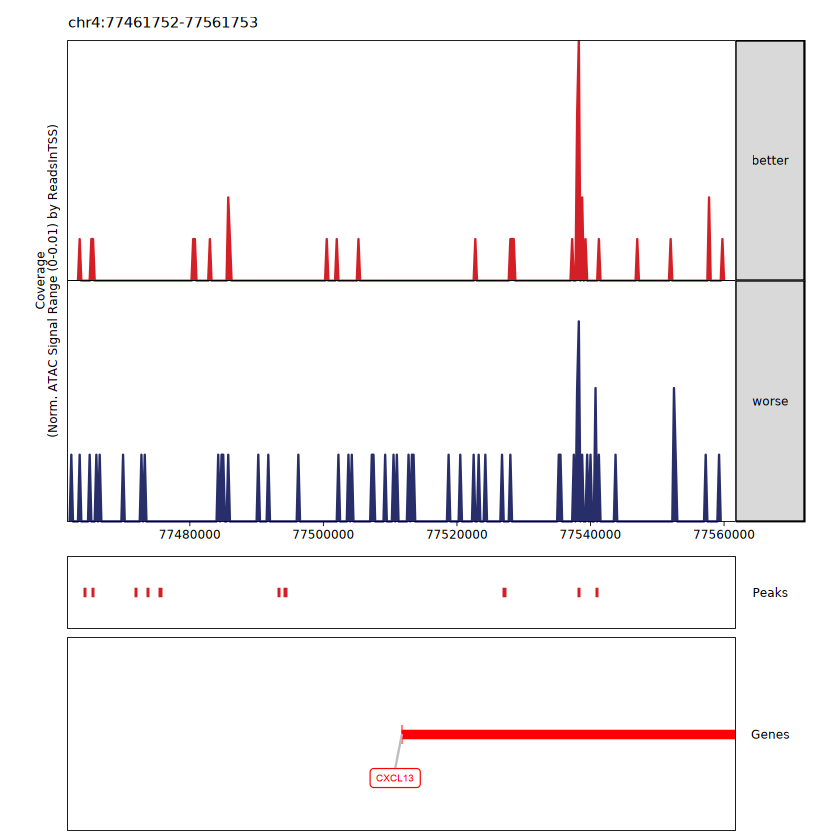

In [11]:
grid::grid.newpage()
grid::grid.draw(p$CXCL13)

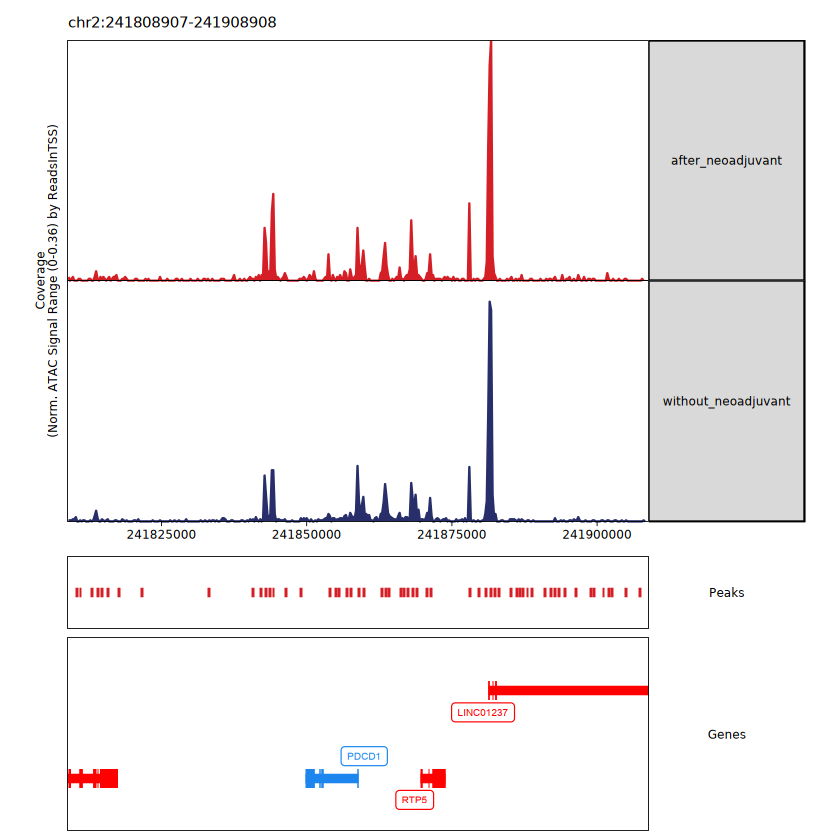

In [6]:
grid::grid.newpage()
grid::grid.draw(p$PDCD1)

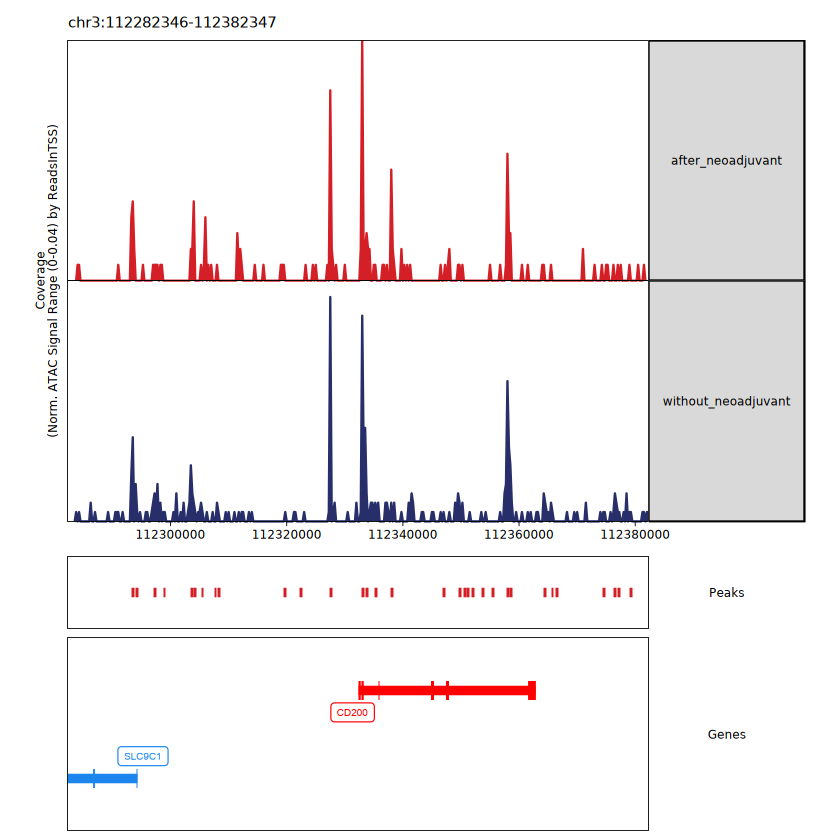

In [7]:
grid::grid.newpage()
grid::grid.draw(p$CD200)

In [12]:
motifPositions <- getPositions(proj_after)
motifPositions

GRangesList object of length 332:
$AP.1.bZIP_1
GRanges object with 67738 ranges and 1 metadata column:
          seqnames              ranges strand |     score
             <Rle>           <IRanges>  <Rle> | <numeric>
      [1]     chr1       832379-832388      + |   9.05348
      [2]     chr1       967006-967015      - |   9.04335
      [3]     chr1     1006754-1006763      - |   9.55856
      [4]     chr1     1022065-1022074      + |   8.77324
      [5]     chr1     1022064-1022073      - |   9.14812
      ...      ...                 ...    ... .       ...
  [67734]     chrX 155334754-155334763      + |   9.64631
  [67735]     chrX 155334560-155334569      - |   9.04335
  [67736]     chrX 155334753-155334762      - |   9.55022
  [67737]     chrX 155888402-155888411      + |   9.77651
  [67738]     chrX 155888401-155888410      - |   9.40673
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

...
<331 more elements>

In [15]:
tfs <- c('CXCL13', 'PDCD1', 'CD200')
markerMotifs <- unique(unlist(lapply(tfs, function(x)
  grep(x, names(motifPositions), value = TRUE, ignore.case = TRUE)
)))
markerMotifs

character(0)

In [14]:
if(is.null(proj_after@projectMetadata$GroupCoverages$effect)){
  proj_after <- addGroupCoverages(ArchRProj = proj_after, groupBy = "effect")
}

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-3a3c9abfdbf01-Date-2025-09-17_Time-09-57-49.536652.log
If there is an issue, please report to github with logFile!

better (1 of 2) : CellGroups N = 2

worse (2 of 2) : CellGroups N = 2

2025-09-17 09:57:52.853466 : Creating Coverage Files!, 0.055 mins elapsed.

2025-09-17 09:57:52.856667 : Batch Execution w/ safelapply!, 0.055 mins elapsed.

2025-09-17 09:57:52.859842 : Group better._.13T (1 of 4) : Creating Group Coverage File : better._.13T.insertions.coverage.h5, 0.055 mins elapsed.

Number of Cells = 500

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2025-09-17 09:58:27.967896 : Group better._.19T (2 of 4) : Creating Group Coverage File : better._.19T.insertions.coverage.h5, 0.641 mins elapsed.

Number of Cells = 500

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info


ERROR: Error in eval(parse(text = genome)): object 'BSgenome.Hsapiens.UCSC.hg38' not found


In [ ]:
seFoot <- getFootprints(
  ArchRProj = proj_after, 
  positions = motifPositions[markerMotifs], 
  groupBy = "effect"
)

In [16]:
# 样本的批次效应去除了，但治疗前后的批次效应没有去除，再次去除治疗前后的批次效应
proj <- addHarmony(
    ArchRProj = proj,
    reducedDims = "IterativeLSI",
    name = "Harmony_Sample",
    groupBy = "Sample",
    force = TRUE
)

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



In [17]:
proj <- addHarmony(
    ArchRProj = proj,
    reducedDims = "Harmony_Sample",
    name = "Harmony_neoadjuvant",
    groupBy = "neoadjuvant",
    force = TRUE
)

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations



In [21]:
proj <- addUMAP(
    ArchRProj = proj,
    reducedDims = "IterativeLSI",
    name = "UMAP_T",
    nNeighbors = 30,   # 默认是 15，可以尝试 30 或更大
    minDist = 0.05,     # 默认是 0.1，可以尝试 0.05 或更小
    metric = "cosine",  # 可以尝试不同的距离度量，如 "euclidean", "manhattan"
    force = TRUE
)

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

14:51:42 UMAP embedding parameters a = 1.75 b = 0.8421

14:51:42 Read 15977 rows and found 29 numeric columns

14:51:42 Using Annoy for neighbor search, n_neighbors = 30

14:51:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*


*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:51:44 Writing NN index file to temp file /tmp/RtmpFSFmXV/file130b67623cfbb9

14:51:44 Searching Annoy index using 48 threads, search_k = 3000

14:51:44 Annoy recall = 100%

14:51:45 Commencing smooth kNN distance calibration using 48 threads
 with target n_neighbors = 30

14:51:46 Initializing from normalized Laplacian + noise (using RSpectra)

14:51:46 Commencing optimization for 200 epochs, with 692092 positive edges

14:51:46 Using rng type: pcg

14:51:56 Optimization finished

14:51:56 Creating temp model dir /tmp/RtmpFSFmXV/dir130b67773ce19

14:51:56 Creating dir /tmp/RtmpFSFmXV/dir130b67773ce19

14:51:58 Changing to /tmp/RtmpFSFmXV/dir130b67773ce19

14:51:58 Creating /home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject_T/Embeddings/Save-Uwot-UMAP-Params-IterativeLSI-130b6730f6a412-Date-2025-09-06_Time-14-51-56.715833.tar



In [18]:
proj <- addUMAP(
    ArchRProj = proj,
    reducedDims = "Harmony_neoadjuvant",
    name = "UMAP_T_Harmony",
    nNeighbors = 45,   # 默认是 15，可以尝试 30 或更大
    minDist = 0.05,     # 默认是 0.1，可以尝试 0.05 或更小
    metric = "cosine",  # 可以尝试不同的距离度量，如 "euclidean", "manhattan"
    force = TRUE
)

14:44:38 UMAP embedding parameters a = 1.75 b = 0.8421

14:44:38 Read 15977 rows and found 29 numeric columns

14:44:38 Using Annoy for neighbor search, n_neighbors = 45

14:44:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*


*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:44:40 Writing NN index file to temp file /tmp/RtmpFSFmXV/file130b6779cc64bc

14:44:40 Searching Annoy index using 48 threads, search_k = 4500

14:44:40 Annoy recall = 100%

14:44:41 Commencing smooth kNN distance calibration using 48 threads
 with target n_neighbors = 45

14:44:42 Initializing from normalized Laplacian + noise (using RSpectra)

14:44:42 Commencing optimization for 200 epochs, with 1071848 positive edges

14:44:42 Using rng type: pcg

14:44:54 Optimization finished

14:44:54 Creating temp model dir /tmp/RtmpFSFmXV/dir130b6726a9acea

14:44:54 Creating dir /tmp/RtmpFSFmXV/dir130b6726a9acea

14:44:56 Changing to /tmp/RtmpFSFmXV/dir130b6726a9acea

14:44:56 Creating /home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject_T/Embeddings/Save-Uwot-UMAP-Params-Harmony_neoadjuvant-130b6726f7289c-Date-2025-09-06_Time-14-44-54.256745.tar



In [19]:
proj <- addClusters(
    proj, 
    reduceDims = "Harmony_neoadjuvant",
    method = "Seurat",
    name = "clusters_T", 
    resolution = 1.0, 
    force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addClusters-130b6724507410-Date-2025-09-06_Time-14-44-56.646573.log
If there is an issue, please report to github with logFile!

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-09-06 14:44:56.854027 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15977
Number of edges: 515706

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7792
Number of communities: 16
Elapsed time: 2 seconds


2025-09-06 14:45:13.746094 : Testing Outlier Clusters, 0.284 mins elapsed.

2025-09-06 14:45:13.751339 : Assigning Cluster Names to 16 Clusters, 0.284 mins elapsed.

2025-09-06 14:45:13.815413 : Finished addClusters, 0.285 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-130b673e43a79f-Date-2025-09-06_Time-14-51-58.578339.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-130b673e43a79f-Date-2025-09-06_Time-14-51-58.578339.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-130b6737df666d-Date-2025-09-06_Time-14-51-58.976357.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-130b6737df666d-Date-2025-09-06_Time-14-51-58.976357.log



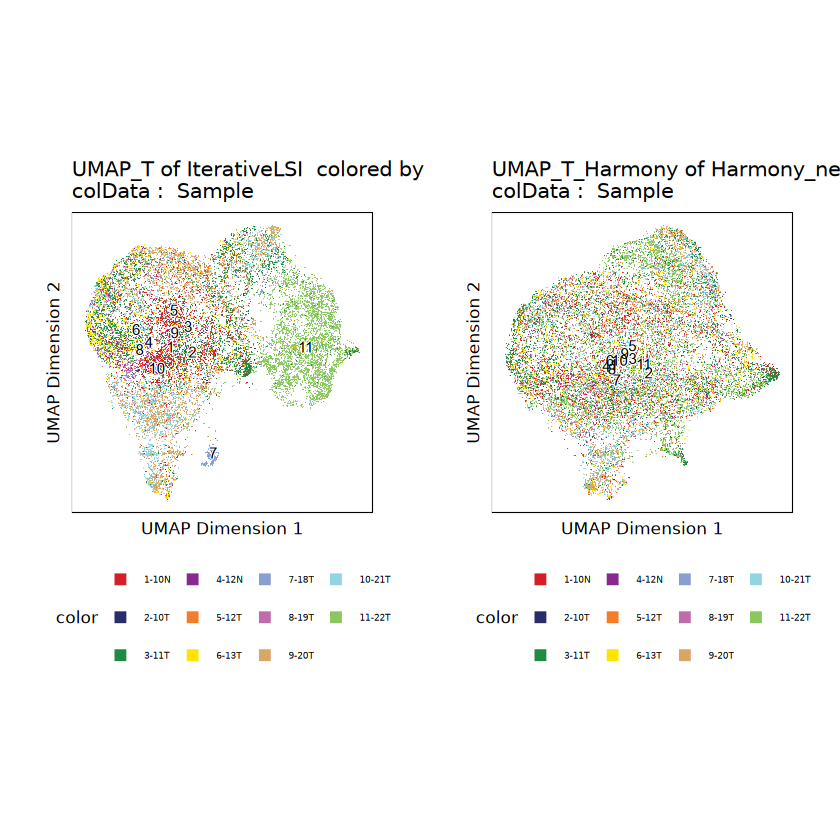

In [22]:
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP_T"
    )
p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP_T_Harmony"
    )
ggAlignPlots(p1, p2, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-130b674fc6effd-Date-2025-09-06_Time-14-45-13.835451.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-130b674fc6effd-Date-2025-09-06_Time-14-45-13.835451.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-130b67708aadeb-Date-2025-09-06_Time-14-45-14.251439.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-130b67708aadeb-Date-2025-09-06_Time-14-45-14.251439.log



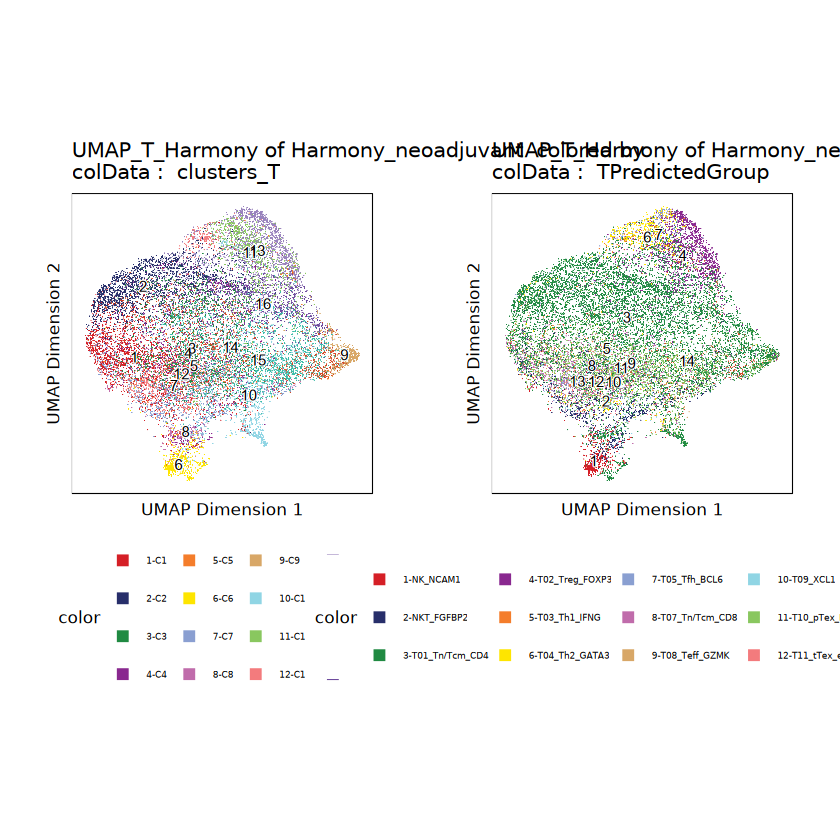

In [20]:
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "clusters_T", 
    embedding = "UMAP_T_Harmony"
    )
p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "TPredictedGroup", 
    embedding = "UMAP_T_Harmony"
    )
ggAlignPlots(p1, p2, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-130b676cd373bb-Date-2025-09-06_Time-15-11-46.816095.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-130b676cd373bb-Date-2025-09-06_Time-15-11-46.816095.log



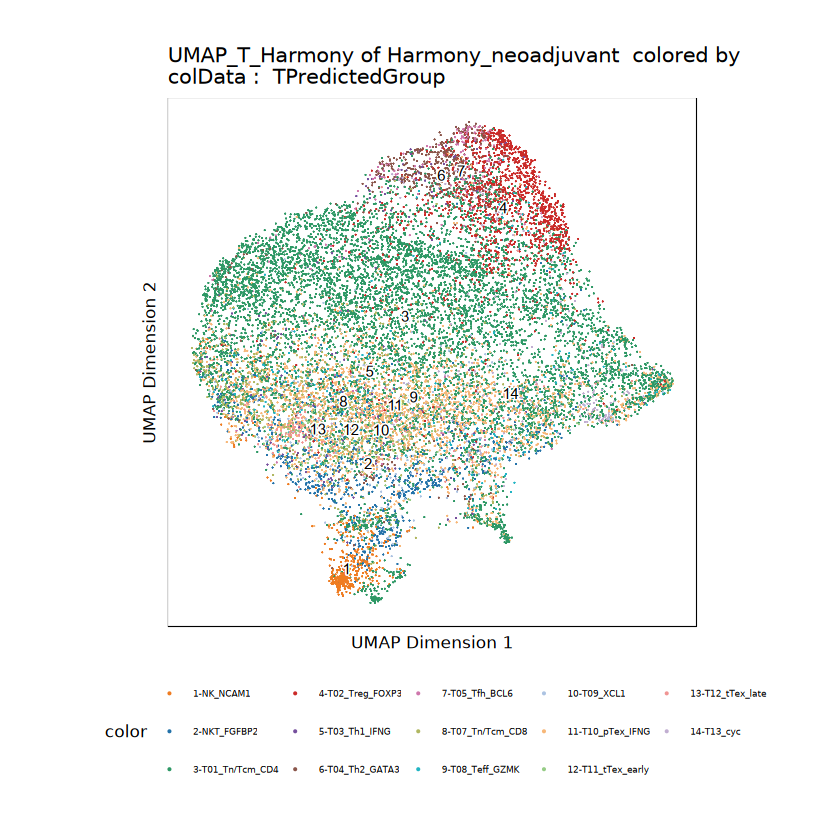

In [34]:
# 设置细胞类型和对应颜色
cell_colors <- c(
  "NKT_FGFBP2" = "#2372A9",   # blue
  "NK_NCAM1" = "#EF7C21",     # orange
  "T01_Tn/Tcm_CD4" = "#2D9865", # green
  "T02_Treg_FOXP3" = "#CA2A28", # red
  "T03_Th1_IFNG" = "#754F9D", # purple (X11)
  "T04_Th2_GATA3" = "#8A554A", # brown
  "T05_Tfh_BCL6" = "#CE76AC", # pink
  "T07_Tn/Tcm_CD8" = "#B0B761", # lightgreen
  "T08_Teff_GZMK" = "#21B4C3", # cyan
  "T09_XCL1" = "#ACC3E2",     # lightblue
  "T10_pTex_IFNG" = "#F7B778", # lightorange
  "T11_tTex_early" = "#96CC86", # lightgreen
  "T12_tTex_late" = "#F09493", # lightpink
  "T13_cyc" = "#C1AED1"       # lightpurple
)


proj$TPredictedGroup <- factor(proj$TPredictedGroup, levels = names(cell_colors))

# 传入自定义颜色
p2 <- plotEmbedding(
  ArchRProj = proj,
  colorBy = "cellColData",
  name = "TPredictedGroup",
  embedding = "UMAP_T_Harmony",
  pal = cell_colors
)
p2

In [36]:
ggsave(
    plot = p2, 
    filename = "/data/hanxue/figures/UMAP_TType_ATAC.svg", 
    width = 6, height = 5
    )

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-35e435668eef4f-Date-2025-03-14_Time-03-18-39.910673.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-35e435668eef4f-Date-2025-03-14_Time-03-18-39.910673.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-35e4354f38234b-Date-2025-03-14_Time-03-18-40.302342.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-35e4354f38234b-Date-2025-03-14_Time-03-18-40.302342.log



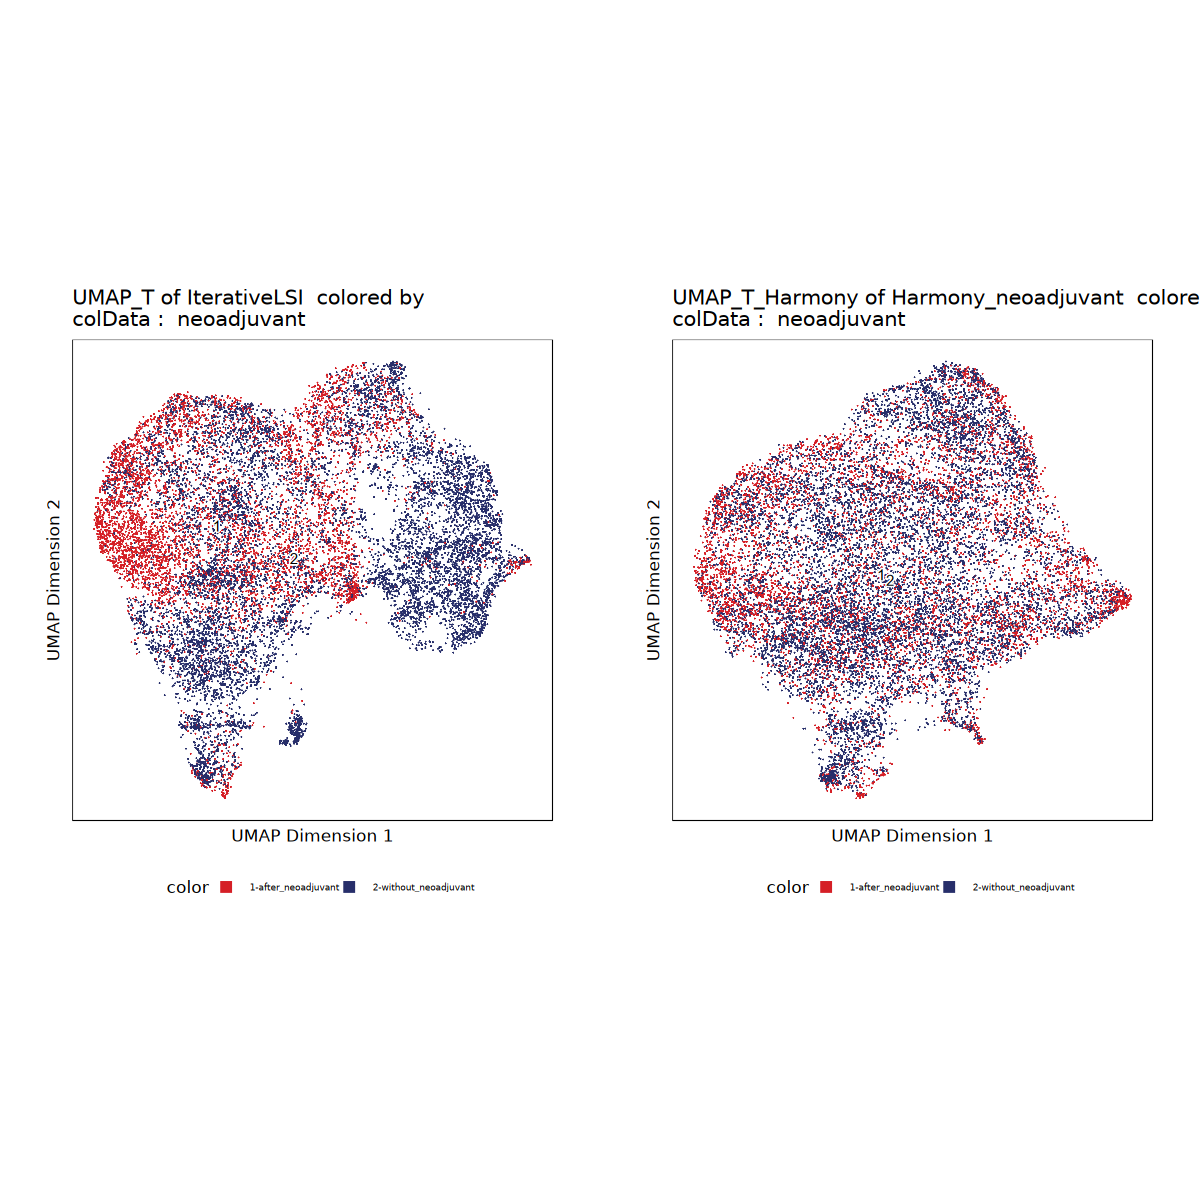

In [101]:
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "neoadjuvant", 
    embedding = "UMAP_T"
    )

p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "neoadjuvant", 
    embedding = "UMAP_T_Harmony"
    )
ggAlignPlots(p1, p2, type = "h")

In [85]:
proj <- addClusters(proj, name = "clusters", resolution = 2.0, force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addClusters-35e4356b08e89b-Date-2025-03-14_Time-03-09-33.45074.log
If there is an issue, please report to github with logFile!

Overriding previous entry for clusters

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-03-14 03:09:33.672794 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.003 mins elapsed.



Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15977
Number of edges: 515706

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7220
Number of communities: 27
Elapsed time: 2 seconds


2025-03-14 03:09:50.886726 : Testing Outlier Clusters, 0.289 mins elapsed.

2025-03-14 03:09:50.893584 : Identified more clusters than maxClusters allowed (n = 0). Merging clusters to maxClusters (n = 25).
If this is not desired set maxClusters = NULL!, 0.29 mins elapsed.

2025-03-14 03:09:51.084071 : Assigning Cluster Names to 25 Clusters, 0.293 mins elapsed.

2025-03-14 03:09:51.154187 : Finished addClusters, 0.294 mins elapsed.



In [102]:
proj <- addClusters(
    proj, 
    reduceDims = "Harmony_neoadjuvant",
    method = "Seurat",
    name = "clusters_harmnoy", 
    resolution = 2.0, 
    force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addClusters-35e43558efae4b-Date-2025-03-14_Time-03-18-56.52206.log
If there is an issue, please report to github with logFile!



Overriding previous entry for clusters_harmnoy

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-03-14 03:18:56.720042 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15977
Number of edges: 515706

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7220
Number of communities: 27
Elapsed time: 2 seconds


2025-03-14 03:19:14.168173 : Testing Outlier Clusters, 0.293 mins elapsed.

2025-03-14 03:19:14.172871 : Identified more clusters than maxClusters allowed (n = 0). Merging clusters to maxClusters (n = 25).
If this is not desired set maxClusters = NULL!, 0.293 mins elapsed.

2025-03-14 03:19:14.187883 : Assigning Cluster Names to 25 Clusters, 0.293 mins elapsed.

2025-03-14 03:19:14.241601 : Finished addClusters, 0.294 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-35e435265c356-Date-2025-03-14_Time-03-19-14.260026.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-35e435265c356-Date-2025-03-14_Time-03-19-14.260026.log



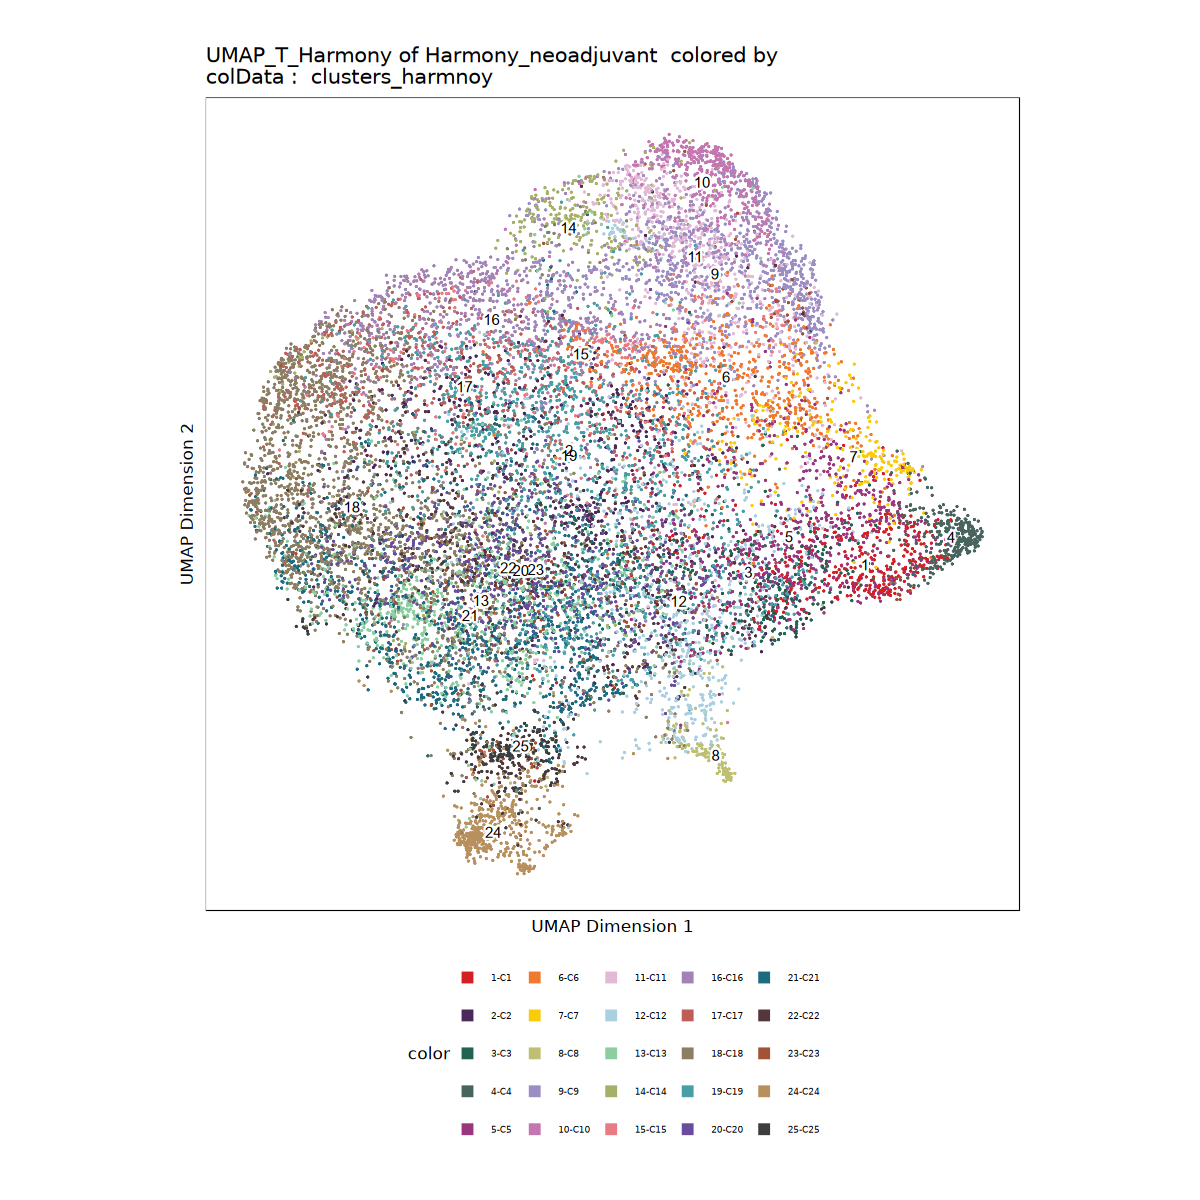

In [103]:
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "clusters_harmnoy", 
    embedding = "UMAP_T_Harmony"
    )
p

In [88]:
getAvailableMatrices(proj)

[1] "ATACMatrix"       "EncodeTFBSMatrix" "GeneScoreMatrix"  "MotifMatrix"     
[5] "PeakMatrix"       "TileMatrix"       "homerMatrix"

In [89]:
# ## marker gene analysis
# markersGS <- getMarkerFeatures(
#     ArchRProj = proj,
#     useMatrix = "GeneScoreMatrix",
#     groupBy = "clusters",
#     bias = c("TSSEnrichment", "log10(nFrags)"),
#     testMethod = "wilcoxon"
#     )

In [90]:
## marker gene analysis
markersGS <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "GeneScoreMatrix",
    groupBy = "clusters",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "ttest"
    )

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-35e4355fac963c-Date-2025-03-14_Time-03-10-12.375982.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Double.Matrix

2025-03-14 03:10:12.667974 : Matching Known Biases, 0.004 mins elapsed.

###########
2025-03-14 03:12:28.663038 : Completed Pairwise Tests, 2.27 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-35e4355fac963c-Date-2025-03-14_Time-03-10-12.375982.log



In [91]:
saveRDS(markersGS, file = "./ArchRProject_T/markersGS_Tclusters.rds")

In [92]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.05 & Log2FC >= 1.25")
## Clusters差异基因，按照FDR排序，并保存为Excel文件
markerList <- lapply(markerList, as.data.frame)

for(i in 1:length(markerList)){
    markerList[[i]] <- markerList[[i]][order(markerList[[i]]$FDR), ]
}
WriteXLS::WriteXLS(markerList,
                   ExcelFileName = "./ArchRProject_T/markersGS_FDR.xlsx",
                   SheetNames = names(markerList))

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-35e43521e91950-Date-2025-03-14_Time-03-12-43.601351.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

C1:

	OR52B6, MEFV, GPR32, KLK1, KLK3, SPINT4, TRIP6, MIR6875, LOC101928211, HAS2, FAM166A, STPG3, LOC105372441, FAM87B, MIR200A

C2:

	SNORD6, ADAMTS19-AS1, FAM87B, MIR200A, MIR429, CFAP74, ACTRT2, ARHGEF16, AJAP1, SLC2A5, MIR34A, MIR6729, PRAMEF20, TMEM51-AS1, C1orf195

C3:

	LOC101928445, ORM2, S1PR5, FAM87B, MIR200A, MIR429, CFAP74, ACTRT2, ARHGEF16, AJAP1, SLC2A5, MIR34A, MIR6729, PRAMEF20, TMEM51-AS1

C4:

	AJAP1, PRAMEF20, C1orf195, ARHGEF10L, ACTL8, IGSF21, PLA2G5, CSMD2, GRIK3, ELAVL4, KANK4, HFM1, ARHGAP29, CYMP-AS1, NHLH2

C5:

	CFAP74, UCMA, EIF5AL1, LINC01499, KRT71, LINC00558, NOVA1, LINC01148, SOX11, BPIFB4, LINC02270, FOXI1, MDFI, PRSS35, MNX1

C6:

	ACTRT2, ARHGEF16, MPPED2, C14orf132, SNORD115-11, C16orf47, PLPPR3, AZU1, LOC101927394, CNTN3, C3orf30, FAM151B, GRM6, LINC0253

  [1] "OR52B6"         "MEFV"           "GPR32"          "KLK1"          
  [5] "KLK3"           "SPINT4"         "TRIP6"          "MIR6875"       
  [9] "LOC101928211"   "HAS2"           "FAM166A"        "STPG3"         
 [13] "LOC105372441"   "FAM87B"         "MIR200A"        "SNORD6"        
 [17] "ADAMTS19-AS1"   "MIR429"         "CFAP74"         "ACTRT2"        
 [21] "ARHGEF16"       "AJAP1"          "SLC2A5"         "MIR34A"        
 [25] "MIR6729"        "PRAMEF20"       "TMEM51-AS1"     "C1orf195"      
 [29] "LOC101928445"   "ORM2"           "S1PR5"          "ARHGEF10L"     
 [33] "ACTL8"          "IGSF21"         "PLA2G5"         "CSMD2"         
 [37] "GRIK3"          "ELAVL4"         "KANK4"          "HFM1"          
 [41] "ARHGAP29"       "CYMP-AS1"       "NHLH2"          "UCMA"          
 [45] "EIF5AL1"        "LINC01499"      "KRT71"          "LINC00558"     
 [49] "NOVA1"          "LINC01148"      "SOX11"          "BPIFB4"        
 [53] "LINC02270"      "FOXI1"        

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-35e43521e91950-Date-2025-03-14_Time-03-12-43.601351.log



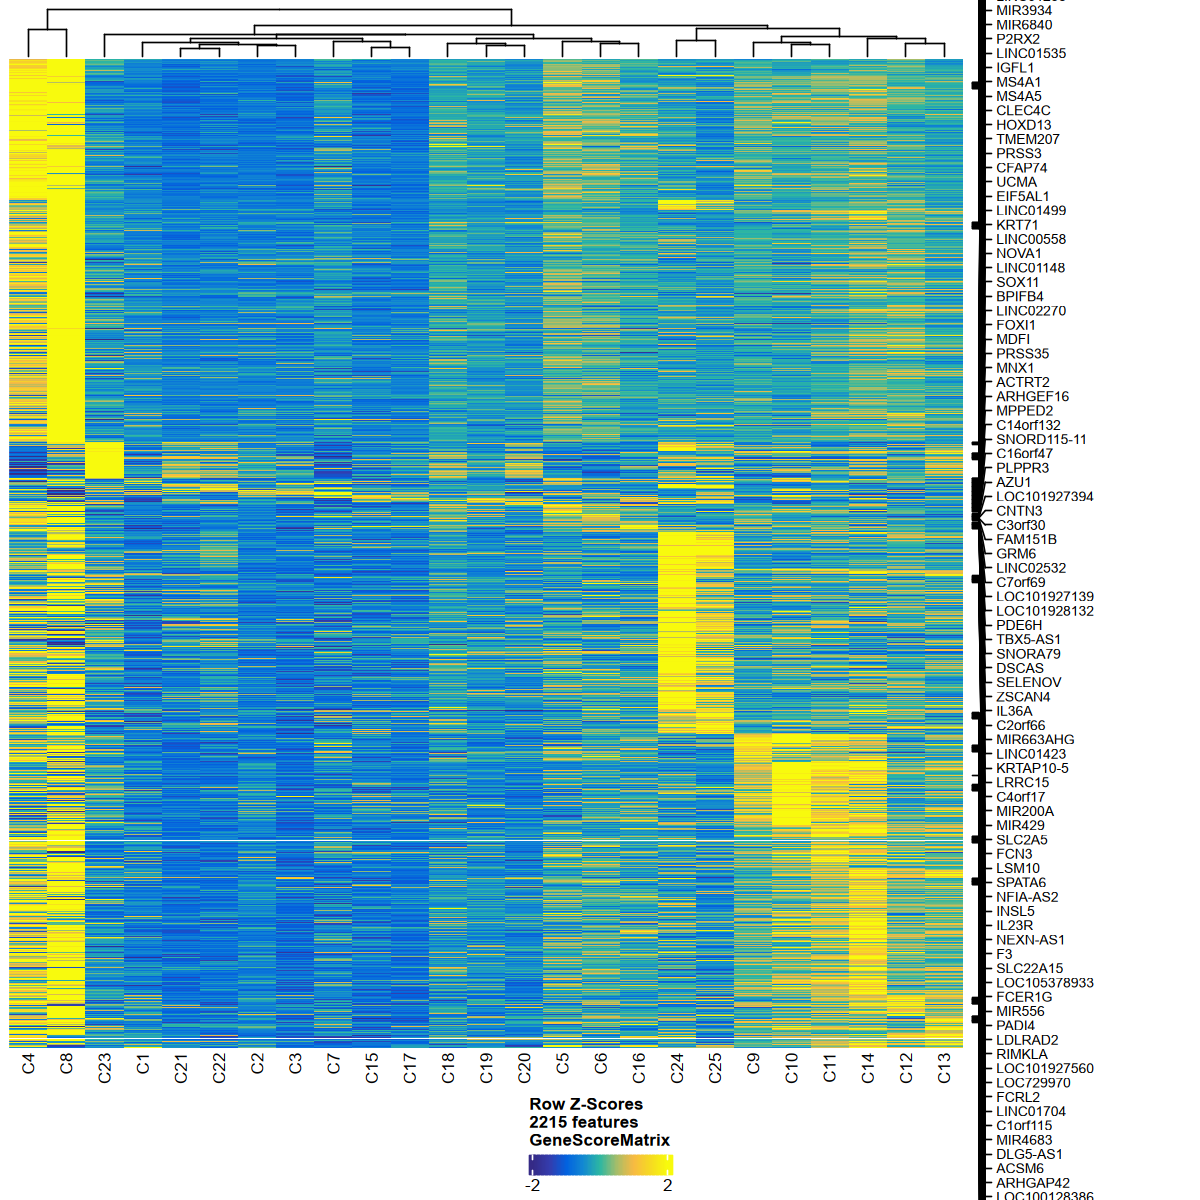

In [93]:
# Heatmap
## marker genes, 根据05_01_annotation中的显著表达来确定绘图的marker genes
markerGenes <- c(
    # 免疫细胞亚型marker genes
)

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 1.25", 
  labelMarkers = markerGenes
)

options(repr.plot.height = 10, repr.plot.width = 10)
ComplexHeatmap::draw(heatmapGS, 
                     heatmap_legend_side = "bot", 
                     annotation_legend_side = "bot")

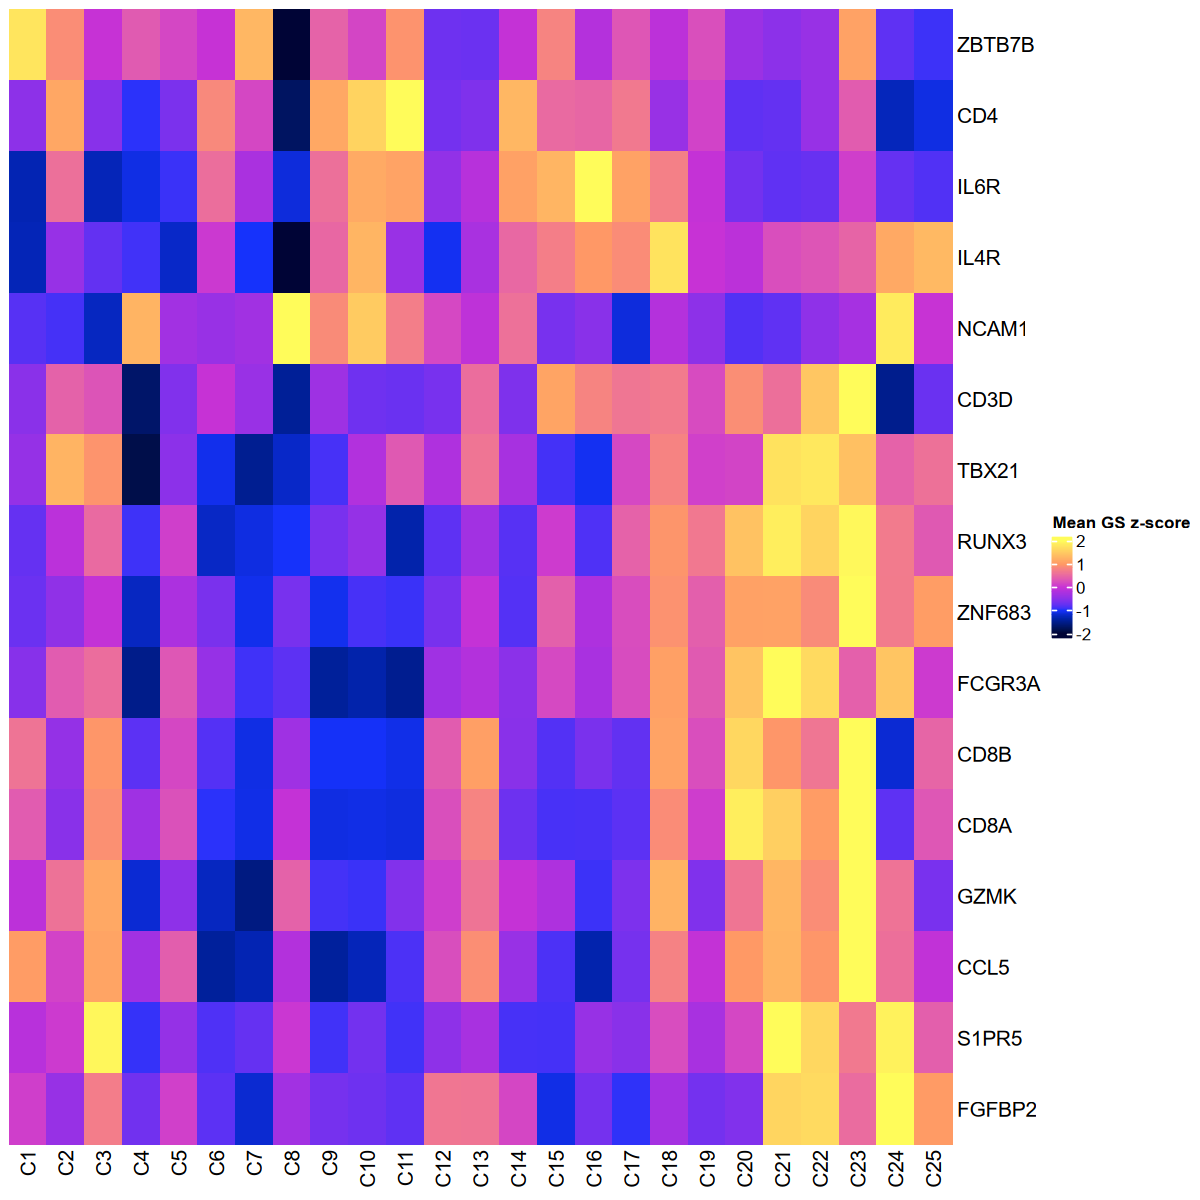

In [94]:
## 后续图 - 基于clusters
### marker gene基因活性
# Heatmap
## marker genes, 根据05_01_annotation中的显著表达来确定绘图的marker genes
markerGenes <- c(
  "CD4", "ZBTB7B", "IL6R", "IL4R", # CD4
  "CD8A", "CD8B", "GZMK", "RUNX3", "S1PR5", "TBX21", "CCL5", # CD8
  "NCAM1","FCGR3A", # NK
  "ZNF683", "FGFBP2" , "CD3D"# NKT
    
)

## 绘制只有marker基因的热图，Mean GS z-score

### 提取差异基因中在marker genes中的基因
idx <- which(mcols(markersGS)$name %in% markerGenes)
### 提取指定行，为矩阵
mtx <- assays(markersGS[idx,])$Mean %>% `rownames<-`(., mcols(markersGS)$name[idx])
### 标准化（z-score），并转置
mtx <- t(scale(t(mtx)))
### 定义层次聚类函数de
fh <- function(x) hclust(dist(x), method="ward.D2")
### 定义颜色函数
col_fun1 <- colorRamp2(c(-2,-1,0,1,2), paletteContinuous(set = "horizonExtra", n = 5))
options(repr.plot.width = 10, repr.plot.height = 10)
ht1 <- Heatmap(mtx, name = "Mean GS z-score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun1)
p3 <- draw(ht1)
p3

In [113]:
mtx

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,⋯,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25
RUNX3,-0.75826993,-0.1212271,0.49254189,-0.9193802,0.0970401,-1.249334241,-1.1203858,-1.00622651,-0.6462857,-0.4473685,⋯,-0.8594781,0.4149421,0.9511074,0.6421726615,1.4005154,1.8529710,1.5881285,1.96011229,0.6680331,0.329790372
ZNF683,-0.72633325,-0.4821968,-0.03716739,-1.2699290,-0.2566801,-0.638075659,-1.0704376,-0.64987761,-1.0589078,-0.8891582,⋯,-0.2337790,0.2174652,0.9182604,0.3886600098,1.0804078,1.0847430,0.8412055,3.13526140,0.6777938,1.035187709
IL6R,-1.33634586,0.5550125,-1.31105038,-1.1041916,-0.9311554,0.537236584,-0.2748230,-1.14781286,0.5568870,1.1678970,⋯,2.4248897,1.0831493,0.7257307,-0.0346830053,-0.6805774,-0.7847940,-0.7467656,0.09213652,-0.7573427,-0.852347424
ZBTB7B,1.75715621,0.8681308,-0.01254713,0.3446315,0.1597665,-0.009949522,1.2906903,-3.49416645,0.4278403,0.1471763,⋯,-0.1815362,0.3016041,-0.1101817,0.2321790234,-0.3959389,-0.5134250,-0.4214323,1.08525671,-0.7895770,-0.921587969
FCGR3A,-0.54930216,0.3526346,0.52498700,-1.5433360,0.3038484,-0.438740290,-0.9128026,-0.79844960,-1.4579766,-1.3765450,⋯,-0.2792307,0.2047434,1.0694714,0.3407644321,1.4212715,2.0127935,1.6449707,0.39937680,1.4361506,0.057264695
NCAM1,-0.82476322,-0.8980512,-1.27622962,1.2590960,-0.3455322,-0.421158035,-0.3541722,2.78838375,0.8472769,1.4925013,⋯,-0.5380450,-1.1432581,-0.1809091,-0.5064648961,-0.8470191,-0.7865161,-0.4918751,-0.30577896,1.8215940,0.005575978
CD3D,-0.52733998,0.4114776,0.28127000,-1.7145477,-0.5933026,-0.011542523,-0.4168964,-1.47399857,-0.3775453,-0.7073985,⋯,0.7692794,0.6188272,0.6721970,0.2006414383,0.8758907,0.5503643,1.4427764,2.62358875,-1.5264574,-0.730500225
CD4,-0.50716542,1.1366814,-0.54142547,-0.9673681,-0.6343024,0.819264655,0.1663353,-1.75776163,1.1419717,1.5721980,⋯,0.4572155,0.6497855,-0.4238109,0.1271649257,-0.7903514,-0.7648031,-0.4354240,0.35833979,-1.2972071,-1.110070066
IL4R,-1.31816910,-0.4349508,-0.77120734,-0.9101472,-1.2391499,0.051319044,-0.9998696,-2.46168578,0.4679504,1.2706749,⋯,0.9922354,0.8560870,1.7385885,-0.0006598096,-0.1127025,0.2295247,0.2928312,0.43980036,1.1545854,1.316930593
CCL5,1.03238245,0.1316148,1.10555186,-0.3438504,0.3764186,-1.456887266,-1.3378660,-0.18887289,-1.4517084,-1.3093104,⋯,-1.3677276,-0.6644008,0.7449952,-0.0388453597,1.0019158,1.2589633,0.9664797,2.10724626,0.5511160,-0.058939787


添加分子分型    

11T: LuminalB,
12N: Normal,
12T: LuminalB,
13T: LuminalB,
19T: LuminalB-HER2


In [95]:
### 添加分子分型信息到proj中
type_annotations <- list(
    "LuminalB" = c("11T", "12T", "13T", "10T", "18T"),
    "Normal" = c("12N", "10N"),
    "LuminalB-HER2" = c("19T", "20T", "21T", "22T")
)
idz <- lapply(type_annotations, function(x) which(proj$Sample %in% x))
# 创建proj$type列，长度为proj@cellColData的行数，初始化为NA
proj$type <- rep(NA, nrow(proj@cellColData))
# 遍历idz中的每一个元素，将proj$type中对应的索引赋值为元素的名称
for(i in names(idz)){proj$type[idz[[i]]] <- i}

In [96]:
## proj@cellColData提取Sample、clusters信息，为data.frame格式
data <- data.frame(
    Sample = proj@cellColData$Sample,
    type = proj@cellColData$type, 
    clusters = proj@cellColData$clusters, 
    clusters_harmony = proj@cellColData$clusters_harmony
    )
rownames(data) <- rownames(proj@cellColData)

In [97]:
## 添加分子分型，保存metadata.csv
write.csv(data, file = "./ArchRProject_T/metadata.csv")

In [98]:
# 保存
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)
sessionInfo()

Saving ArchRProject...



R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/hanxue/miniconda3/envs/scseq/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] circlize_0.4.16             ComplexHeatmap_2.21.2      
 [3] nabor_0.5.0                 harmony_1.2.3              
 [5] Signac_1.14.0               Seurat_5.2.1 